# Importing all the Libraries 

In [1]:
import tensorflow as tf
import os
import numpy as np
from skimage import feature
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
%load_ext tensorboard

In [2]:
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


2.4.1
2.4.0


# Connecting the colab notebook with myDrive 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
from mlxtend.data import loadlocal_mnist

# Loading the dataset from my Drive and Initialising the Data 

In [5]:
train_image_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/train-images-idx3-ubyte'
train_label_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/train-labels-idx1-ubyte' 
test_image_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/t10k-images-idx3-ubyte'
test_label_path = '/content/gdrive/My Drive/DeepLearning_A1/dataset/t10k-labels-idx1-ubyte'

In [6]:
train_images, train_labels = loadlocal_mnist(images_path= train_image_path, labels_path= train_label_path)
test_images, test_labels = loadlocal_mnist(images_path= test_image_path, labels_path= test_label_path)

class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]

In [7]:
#reshaping the flatten pre-processed data
train_images=train_images.reshape(-1,28,28)
test_images=test_images.reshape(-1,28,28)

In [8]:
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


7


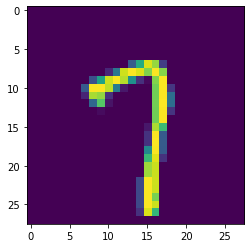

In [9]:
# Show an image from the data
import matplotlib.pyplot as plt
plt.imshow(train_images[786])
print(train_labels[786])

In [10]:
#Using slicing to split the training to train and validation

valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]

train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images / 255.0

In [11]:
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

print(np.shape(valid_labels))
print(np.shape(train_labels))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)
(5000,)
(55000,)


# Initialing the Layers and fitting the model

In [12]:
#initialing the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [13]:
# Train and fit the model with given dataset
model.compile(optimizer = tf.optimizers.Adam(),       
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=15,validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3589 - accuracy: 0.8940 - val_loss: 0.0983 - val_accuracy: 0.9704
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0906 - accuracy: 0.9728 - val_loss: 0.0935 - val_accuracy: 0.9716
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0560 - accuracy: 0.9816 - val_loss: 0.0709 - val_accuracy: 0.9794
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0731 - val_accuracy: 0.9784
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0685 - val_accuracy: 0.9804
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0759 - val_accuracy: 0.9790
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0811 - val_accuracy:

In [14]:
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Initialing the model 

In [15]:
#Different model with SGD as optimizer
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0389 - accuracy: 0.7288 - val_loss: 0.3691 - val_accuracy: 0.9024
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3637 - accuracy: 0.8995 - val_loss: 0.2975 - val_accuracy: 0.9206
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3045 - accuracy: 0.9163 - val_loss: 0.2637 - val_accuracy: 0.9288
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2752 - accuracy: 0.9224 - val_loss: 0.2402 - val_accuracy: 0.9338
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2471 - accuracy: 0.9318 - val_loss: 0.2228 - val_accuracy: 0.9390
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2311 - accuracy: 0.9359 - val_loss: 0.2070 - val_accuracy: 0.9432
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2140 - accuracy: 0.9398 - val_loss: 0.1951 - val_accuracy:

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


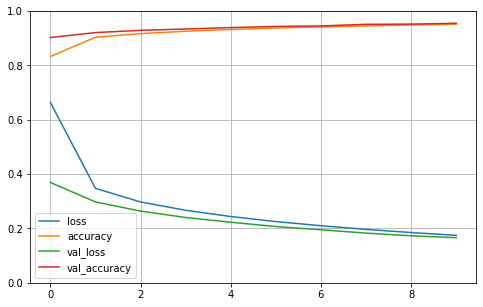

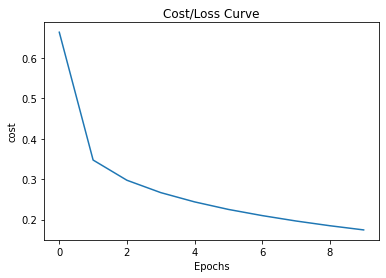

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

# Evaluating the Performance of the trained model with confusion matrix

In [18]:
# Accuracy for model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9809


[0.08500352501869202, 0.98089998960495]

In [19]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1704 - accuracy: 0.9501


[0.1703963428735733, 0.9501000046730042]

In [20]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it 

for im_index in range(len(test_images)):
  imag = test_images[im_index]
  
  # Perform classification, Hint: use model.predict()
  prediction = model.predict_classes(imag.reshape(1,-1))
  
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(test_labels[im_index])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
accuracy = metrics.accuracy_score(predict_label, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9809


[[ 978    1    0    0    1    0    0    0    0    0]
 [   0 1128    4    0    0    0    1    0    2    0]
 [   3    0 1017    1    1    0    2    4    3    1]
 [   0    0   10  984    1    3    0    3    4    5]
 [   1    0    8    0  960    0    1    1    2    9]
 [   3    0    0    8    1  872    5    0    1    2]
 [   7    2    0    1    2    1  945    0    0    0]
 [   2    3   10    1    1    0    0 1002    2    7]
 [  10    1    8    2    4    3    4    1  937    4]
 [   3    3    0    2    6    2    0    3    4  986]]


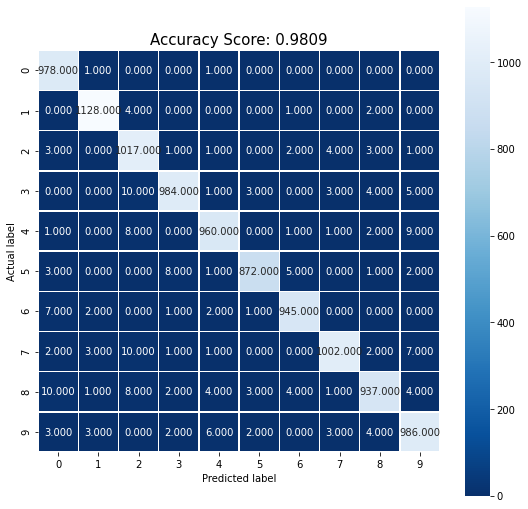

In [22]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(predict_label, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);